## hw2 - searching the burning building

In [1]:
from hw2a import *
from notebook4e import *
import numpy as np

In [2]:
main()

hours
# is it greater than 0?
 OK  got: 2 expected: <function main.<locals>.<lambda> at 0x7ea5e3552cb0>
temp(node)
 OK  got: 70 expected: 70
 OK  got: 500 expected: 500
 OK  got: 60 expected: 60
No temp for node:  ENTRANCE
 OK  got: None expected: None
room_depth_first
 OK  got: (['S19', 'S29', 'S39', 'S49', 'H49', 'H48', 'H47', 'H46', 'R46', 'R45', 'R44', 'H44', 'H43', 'H42', 'H41', 'H40', 'S40', 'S30', 'S20'], 125, 26) expected: (['S19', 'S29', 'S39', 'S49', 'H49', 'H48', 'H47', 'H46', 'R46', 'R45', 'R44', 'H44', 'H43', 'H42', 'H41', 'H40', 'S40', 'S30', 'S20'], 125, 26)
 OK  got: (['S30', 'S40', 'H40', 'H41', 'H42', 'H43', 'H44', 'H45', 'H46', 'H47', 'H48', 'H49', 'S49', 'S39', 'S29', 'S19', 'EXIT'], 115, 21) expected: (['S30', 'S40', 'H40', 'H41', 'H42', 'H43', 'H44', 'H45', 'H46', 'H47', 'H48', 'H49', 'S49', 'S39', 'S29', 'S19', 'EXIT'], 115, 21)
 OK  got: (['S19', 'S29', 'S39', 'S49', 'H49', 'H48', 'H47', 'H46', 'R46', 'R45', 'R44', 'H44', 'H43', 'H42', 'H41', 'H40', 'S40', 'S30'

In [3]:
np.int = int        # Turnaround to resolve deprecated conflict
# import networkx as nx


In [4]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

Data for burning building

In [5]:

xnode_colors = {node: 'white' for node in room_map.locations.keys()}
xnode_positions = room_map.locations
xnode_label_pos = { k:[v[0],v[1]-10]  for k,v in room_map.locations.items() }
xedge_weights = {(k, k2) : v2 for k, v in room_map.graph_dict.items() for k2, v2 in v.items()}

room_graph_data = {  'graph_dict' : room_map.graph_dict,
                     'node_colors': xnode_colors,
                     'node_positions': xnode_positions,
                     'node_label_positions': xnode_label_pos,
                     'edge_weights': xedge_weights
}


In [6]:
room_locations = room_map.locations
print(room_locations)

{'H10': (40, 50), 'H11': (50, 50), 'H12': (60, 50), 'H13': (70, 50), 'H14': (80, 50), 'H15': (90, 50), 'H16': (100, 50), 'H17': (110, 50), 'H18': (120, 50), 'H19': (130, 50), 'S10': (40, 50), 'R11': (50, 60), 'R12': (60, 60), 'R13': (70, 60), 'R14': (80, 60), 'R15': (90, 60), 'R16': (100, 60), 'R17': (110, 60), 'R18': (120, 60), 'R19': (130, 60), 'S19': (140, 50), 'EXIT': (165, 40), 'H20': (40, 75), 'H21': (50, 75), 'H22': (60, 75), 'H23': (70, 75), 'H24': (80, 75), 'H25': (90, 75), 'H26': (100, 75), 'H27': (110, 75), 'H28': (120, 75), 'H29': (130, 75), 'S20': (40, 75), 'R21': (50, 85), 'R22': (60, 85), 'R23': (70, 85), 'R24': (80, 85), 'R25': (90, 85), 'R26': (100, 85), 'R27': (110, 85), 'R28': (120, 85), 'R29': (130, 85), 'S29': (140, 75), 'H30': (40, 100), 'H31': (50, 100), 'H32': (60, 100), 'H33': (70, 100), 'H34': (80, 100), 'H35': (90, 100), 'H36': (100, 100), 'H37': (110, 100), 'H38': (120, 100), 'H39': (130, 100), 'S30': (40, 100), 'R31': (50, 110), 'R32': (60, 110), 'R33': (70

ValueError: too many values to unpack (expected 3)

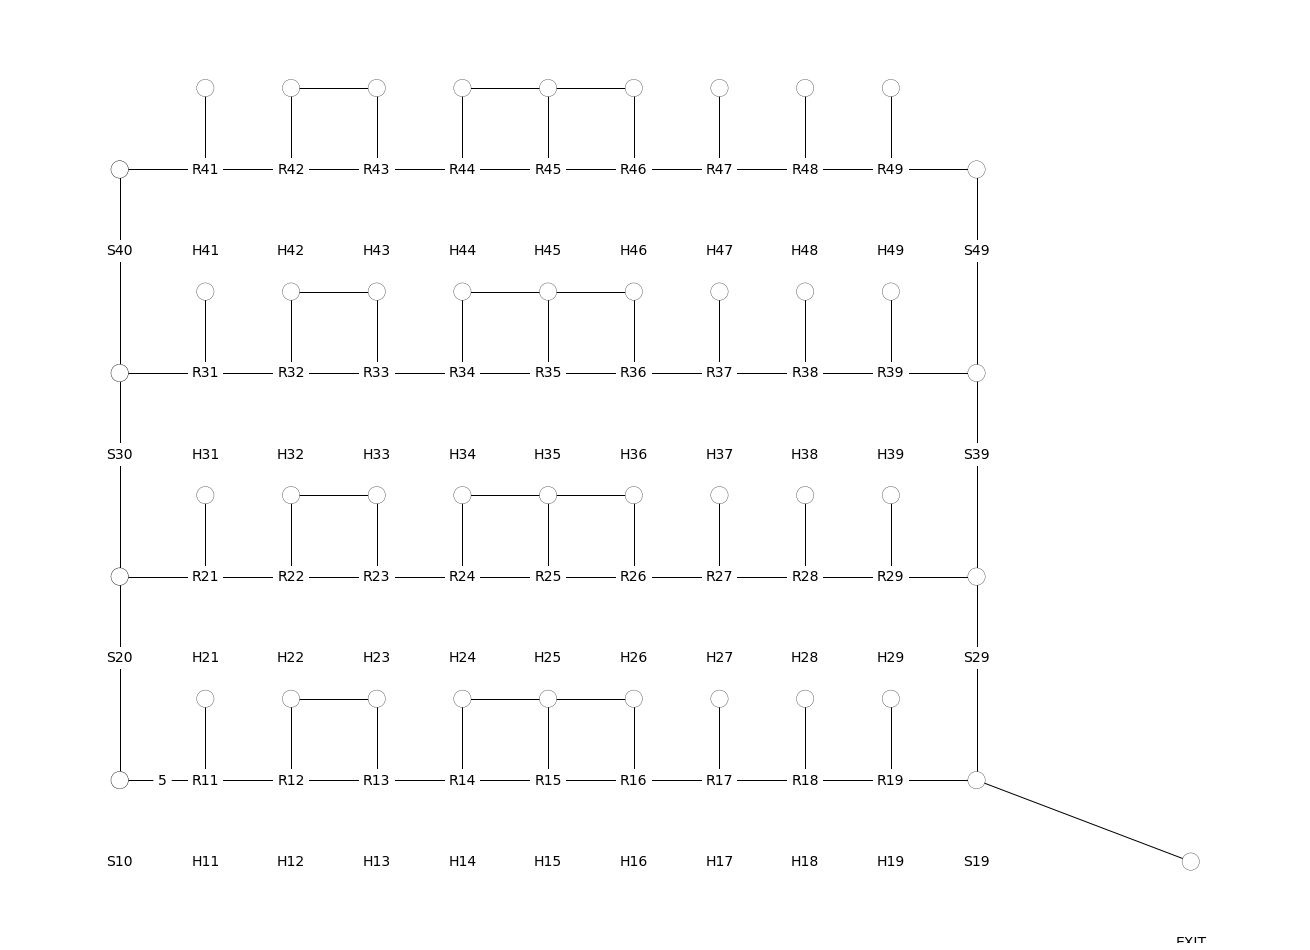

In [7]:
show_map(room_graph_data)

In [8]:
xnode_label_pos

{'H10': [40, 40],
 'H11': [50, 40],
 'H12': [60, 40],
 'H13': [70, 40],
 'H14': [80, 40],
 'H15': [90, 40],
 'H16': [100, 40],
 'H17': [110, 40],
 'H18': [120, 40],
 'H19': [130, 40],
 'S10': [40, 40],
 'R11': [50, 50],
 'R12': [60, 50],
 'R13': [70, 50],
 'R14': [80, 50],
 'R15': [90, 50],
 'R16': [100, 50],
 'R17': [110, 50],
 'R18': [120, 50],
 'R19': [130, 50],
 'S19': [140, 40],
 'EXIT': [165, 30],
 'H20': [40, 65],
 'H21': [50, 65],
 'H22': [60, 65],
 'H23': [70, 65],
 'H24': [80, 65],
 'H25': [90, 65],
 'H26': [100, 65],
 'H27': [110, 65],
 'H28': [120, 65],
 'H29': [130, 65],
 'S20': [40, 65],
 'R21': [50, 75],
 'R22': [60, 75],
 'R23': [70, 75],
 'R24': [80, 75],
 'R25': [90, 75],
 'R26': [100, 75],
 'R27': [110, 75],
 'R28': [120, 75],
 'R29': [130, 75],
 'S29': [140, 65],
 'H30': [40, 90],
 'H31': [50, 90],
 'H32': [60, 90],
 'H33': [70, 90],
 'H34': [80, 90],
 'H35': [90, 90],
 'H36': [100, 90],
 'H37': [110, 90],
 'H38': [120, 90],
 'H39': [130, 90],
 'S30': [40, 90],
 'R3

In [9]:
psource(show_map)

In [10]:
def tree_breadth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the queue
    frontier = deque([Node(problem.initial)])
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of queue
        node = frontier.popleft()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def breadth_first_tree_search(problem):
    "Search the shallowest nodes in the search tree first."
    iterations, all_node_colors, node = tree_breadth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [11]:
from ipywidgets import *

In [12]:
all_node_colors = []
room_problem = GraphProblem('R18', 'EXIT', room_map)
a, b, c = breadth_first_tree_search(room_problem)
display_visual(room_graph_data, user_input=False, 
               algorithm=breadth_first_tree_search, 
               problem=room_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…

In [13]:
def tree_depth_search_for_vis(problem):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    
    # we use these two variables at the time of visualisations
    iterations = 0
    all_node_colors = []
    node_colors = {k : 'white' for k in problem.graph.nodes()}
    
    #Adding first node to the stack
    frontier = [Node(problem.initial)]
    
    node_colors[Node(problem.initial).state] = "orange"
    iterations += 1
    all_node_colors.append(dict(node_colors))
    
    while frontier:
        #Popping first node of stack
        node = frontier.pop()
        
        # modify the currently searching node to red
        node_colors[node.state] = "red"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
        if problem.goal_test(node.state):
            # modify goal node to green after reaching the goal
            node_colors[node.state] = "green"
            iterations += 1
            all_node_colors.append(dict(node_colors))
            return(iterations, all_node_colors, node)
        
        frontier.extend(node.expand(problem))
           
        for n in node.expand(problem):
            node_colors[n.state] = "orange"
            iterations += 1
            all_node_colors.append(dict(node_colors))

        # modify the color of explored nodes to gray
        node_colors[node.state] = "gray"
        iterations += 1
        all_node_colors.append(dict(node_colors))
        
    return None

def depth_first_tree_search(problem):
    "Search the deepest nodes in the search tree first."
    iterations, all_node_colors, node = tree_depth_search_for_vis(problem)
    return(iterations, all_node_colors, node)

In [14]:
all_node_colors = []
room_problem = GraphProblem('R35', 'EXIT', room_map)
a, b, c = breadth_first_tree_search(room_problem)
display_visual(room_graph_data, user_input=False, 
               algorithm=depth_first_tree_search, 
               problem=room_problem)

interactive(children=(IntSlider(value=0, description='iteration', max=1), Output()), _dom_classes=('widget-int…

interactive(children=(ToggleButton(value=False, description='visualize'), Output()), _dom_classes=('widget-int…